<a href="https://colab.research.google.com/github/ajit-rajput/misc-notebooks/blob/main/QoS_Predict_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We want to predict QoS metrics such as latency, jitter, or packet loss based on network traffic features (bandwidth usage, packets per second, protocol, etc.).
using deep learning method

Input: Network traffic statistics

Output: QoS metric (regression) or QoS category (classification: Good / Medium / Poor)

Sample dataset:
   bandwidth  packets_per_sec  concurrent_flows  protocol  packet_loss  \
0        200             2863                81        17         4.30   
1        500            93010               149         6         4.34   
2        100            55580                46         6         2.36   
3        500            38859               144         6         2.57   
4        500            76167                16        17         4.18   

   jitter  queue_size  retransmissions  latency qos_class  
0   43.99         865              442    42.55    Medium  
1   46.35         871              290    52.20    Medium  
2    1.22         465               30    18.67      Good  
3   49.43         331              119    47.56    Medium  
4   35.50         836               78    30.94    Medium  
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6351 - loss: 0.8704 - val_accuracy: 0.7437 - val_loss: 0.6496
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7024 - loss: 0.6856 - val_accuracy: 0.7663 - val_loss: 0.5411
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7373 - loss: 0.5979 - val_accuracy: 0.7812 - val_loss: 0.5079
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7360 - loss: 0.5785 - val_accuracy: 0.7900 - val_loss: 0.4904
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7514 - loss: 0.5367 - val_accuracy: 0.8037 - val_loss: 0.4713
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7548 - loss: 0.5301 - val_accuracy: 0.8138 - val_loss: 0.4406
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7804 - loss: 0.4946 - val_accuracy: 0.8200 - val_loss: 0.4303
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7772 - loss: 0.4908 - val_accuracy: 0.8288 - val_

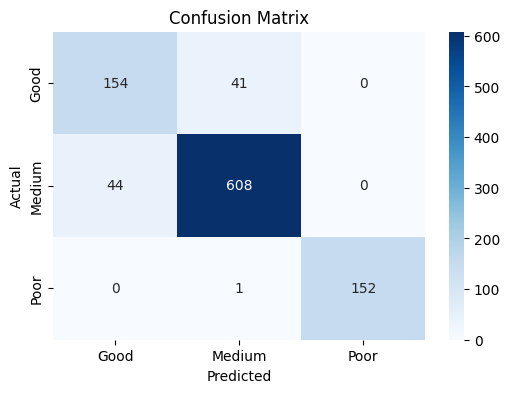


Classification Report:
              precision    recall  f1-score   support

        Good       0.78      0.79      0.78       195
      Medium       0.94      0.93      0.93       652
        Poor       1.00      0.99      1.00       153

    accuracy                           0.91      1000
   macro avg       0.90      0.91      0.90      1000
weighted avg       0.91      0.91      0.91      1000



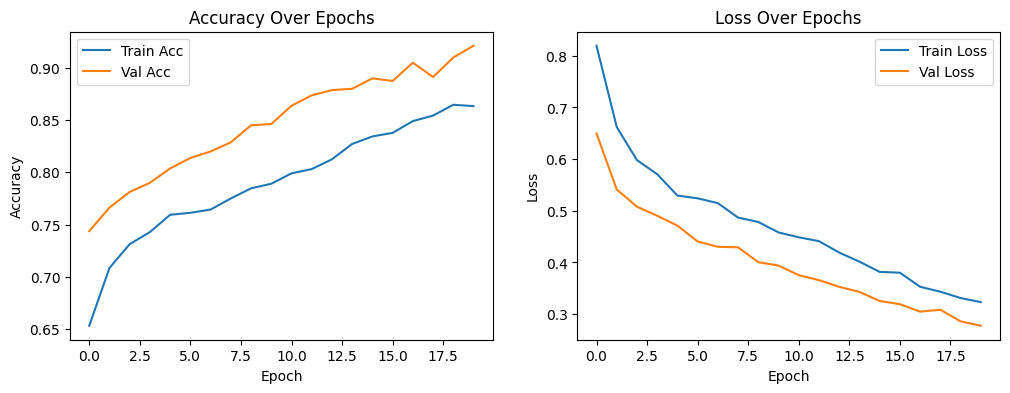

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

Prediction for sample input: ['Good']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
# Example 1: QoS Classification with Deep Learning & Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# -----------------------
# Step 1: Generate synthetic dataset
# -----------------------
np.random.seed(42)
n_samples = 5000

bandwidth = np.random.choice([10, 50, 100, 200, 500, 1000], n_samples)
packets_per_sec = np.random.randint(100, 100000, n_samples)
concurrent_flows = np.random.randint(1, 200, n_samples)
protocol = np.random.choice([6, 17, 1], n_samples, p=[0.6, 0.35, 0.05])  # TCP/UDP/ICMP
packet_loss = np.round(np.random.uniform(0, 5, n_samples), 2)  # %
jitter = np.round(np.random.uniform(0, 50, n_samples), 2)  # ms
queue_size = np.random.randint(10, 1000, n_samples)
retransmissions = np.random.randint(0, 500, n_samples)

latency = (
    5
    + (1000 / bandwidth)
    + (packet_loss * 2)
    + (jitter * 0.5)
    + (concurrent_flows * 0.1)
    + np.random.normal(0, 5, n_samples)
)

qos_class = []
for l in latency:
    if l < 30:
        qos_class.append("Good")
    elif l < 80:
        qos_class.append("Medium")
    else:
        qos_class.append("Poor")

df = pd.DataFrame({
    "bandwidth": bandwidth,
    "packets_per_sec": packets_per_sec,
    "concurrent_flows": concurrent_flows,
    "protocol": protocol,
    "packet_loss": packet_loss,
    "jitter": jitter,
    "queue_size": queue_size,
    "retransmissions": retransmissions,
    "latency": np.round(latency, 2),
    "qos_class": qos_class
})

print("Sample dataset:")
print(df.head())

# -----------------------
# Step 2: Prepare data
# -----------------------
X = df.drop(["latency", "qos_class"], axis=1)
y = df["qos_class"]

encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Good=0, Medium=1, Poor=2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------
# Step 3: Build Deep Learning Model
# -----------------------
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))
model.add(Dense(3, activation="softmax"))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# -----------------------
# Step 4: Train Model
# -----------------------
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# -----------------------
# Step 5: Evaluate Model
# -----------------------
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {acc*100:.2f}%")

# -----------------------
# Step 6: Confusion Matrix & Classification Report
# -----------------------
y_pred = np.argmax(model.predict(X_test), axis=-1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# -----------------------
# Step 7: Accuracy & Loss Curves
# -----------------------
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

# -----------------------
# Step 8: Predict Example
# -----------------------
sample = np.array([[100, 20000, 50, 6, 0.5, 10, 200, 10]])  # Example input
sample = scaler.transform(sample)
pred = model.predict(sample)
print("\nPrediction for sample input:", encoder.inverse_transform([np.argmax(pred)]))
